In [1]:
!pip install xgboost

  Using cached xgboost-2.0.2-py3-none-win_amd64.whl (99.8 MB)



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
import xgboost as xgb
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoLarsIC
from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from scipy.stats import pearsonr
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
import statsmodels.api as sm
from prettytable import PrettyTable
from warnings import filterwarnings
filterwarnings('ignore')

## Training Dataset

In [3]:
# !pip install --upgrade --force-reinstall --no-deps kaggle==1.5.8
# !mkdir /root/.kaggle

# with open("/root/.kaggle/kaggle.json", "w+") as f:
#     f.write('{"username":"yvesmariekirunga","key":"b14fc5e9ce99e4b4b7668bf22d17b34e"}')
#     # Put your kaggle username & key here

# !chmod 600 /root/.kaggle/kaggle.json

In [4]:

data= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
# data=pd.read_csv("titanic3.csv")
# data= pd.read_csv("/kaggle/input/titanic/train.csv")
# test= pd.read_csv("/kaggle/input/titanic/test.csv")
test_ids = test["PassengerId"]

#### The variables that was provided had the following descriptors:
1. Survived: Survived (1) or died (0) 
2. Pclass: Passenger’s class
3. Name: Passenger’s name
4. Sex: Passenger’s sex
5. Age: Passenger’s age
6. SibSp: Number of siblings/spouses aboard
7. Parch: Number of parents/children aboard
8. Ticket: Ticket number
9. Fare: Fare
10. Cabin: Cabin
11. Embarked: Port of embarkation

## Exploratory data analysis

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
len(data)

891

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Feature Exploration

#### The percentage of survived passengers

In [9]:
def bar_chart(feature):
    survived=data[data['Survived']==1][feature].value_counts()
    dead=data[data['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(15,7))

In [10]:
survived_pass=data['Survived'].value_counts()
survived_pass=survived_pass[1]/len(data)*100
# print(f"According to the train data available {round(survived_pass,3)%} of passengers survived the disaster.")

In [11]:
survival=data[data['Survived'] == 1]
unsurvival=data[data['Survived'] == 0]

#### The Passenger class

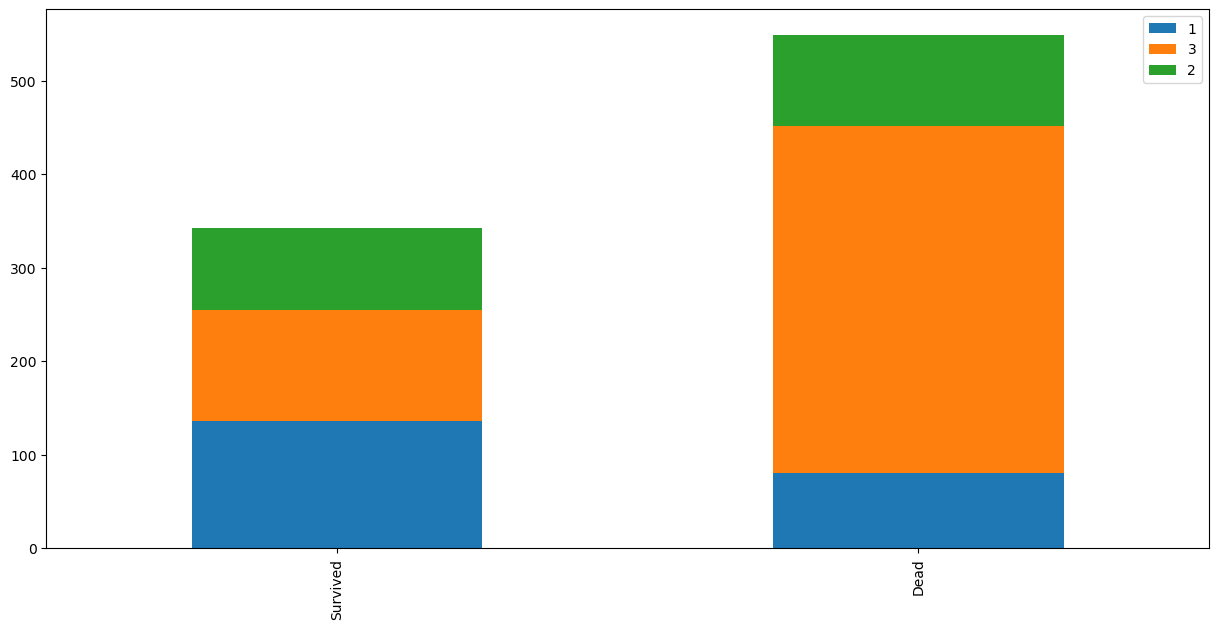

In [12]:
bar_chart('Pclass')

In [13]:
survived_class=survival['Pclass'].value_counts()
survived1_class=survived_class[1]/len(data)*100
survived2_class=survived_class[2]/len(data)*100
survived3_class=survived_class[3]/len(data)*100
print("Survived Passengers Per Seats:")
print(f"First Class {round(survived1_class,3)}%.")
print(f"Second Class {round(survived2_class,3)}%")
print(f"Third Class {round(survived3_class,3)}%")

Survived Passengers Per Seats:
First Class 15.264%.
Second Class 9.764%
Third Class 13.356%


In [14]:
survived_class

1    136
3    119
2     87
Name: Pclass, dtype: int64

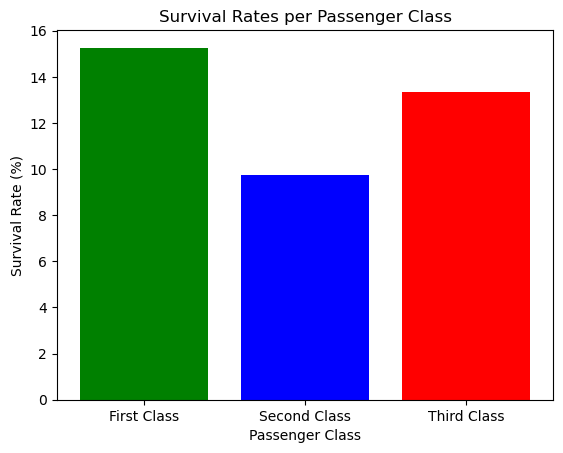

In [15]:
plt.bar(['First Class', 'Second Class', 'Third Class'], [survived1_class, survived2_class, survived3_class], color=['green', 'blue', 'red'])
plt.title('Survival Rates per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.show()

In [16]:
unsurvived_class=unsurvival['Pclass'].value_counts()
unsurvived1_class=unsurvived_class[1]/len(data)*100
unsurvived2_class=unsurvived_class[2]/len(data)*100
unsurvived3_class=unsurvived_class[3]/len(data)*100
print("Un-Survived Passengers Per Seats:")
print(f"First Class {round(unsurvived1_class,3)}%.")
print(f"Second Class {round(unsurvived2_class,3)}%")
print(f"Third Class {round(unsurvived3_class,3)}%")

Un-Survived Passengers Per Seats:
First Class 8.979%.
Second Class 10.887%
Third Class 41.751%


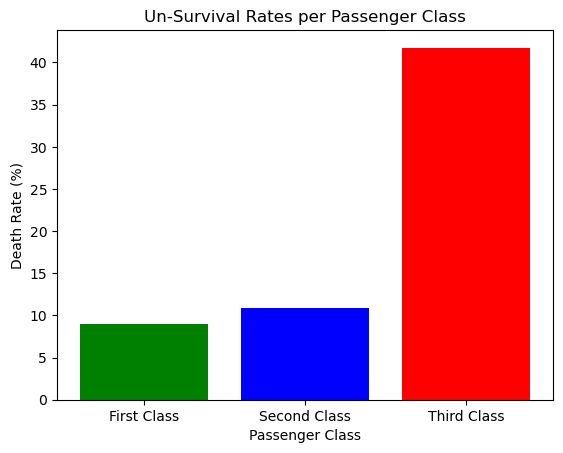

In [17]:
plt.bar(['First Class', 'Second Class', 'Third Class'], [unsurvived1_class, unsurvived2_class, unsurvived3_class], color=['green', 'blue', 'red'])
plt.title('Un-Survival Rates per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Death Rate (%)')
plt.show()

#### Gender

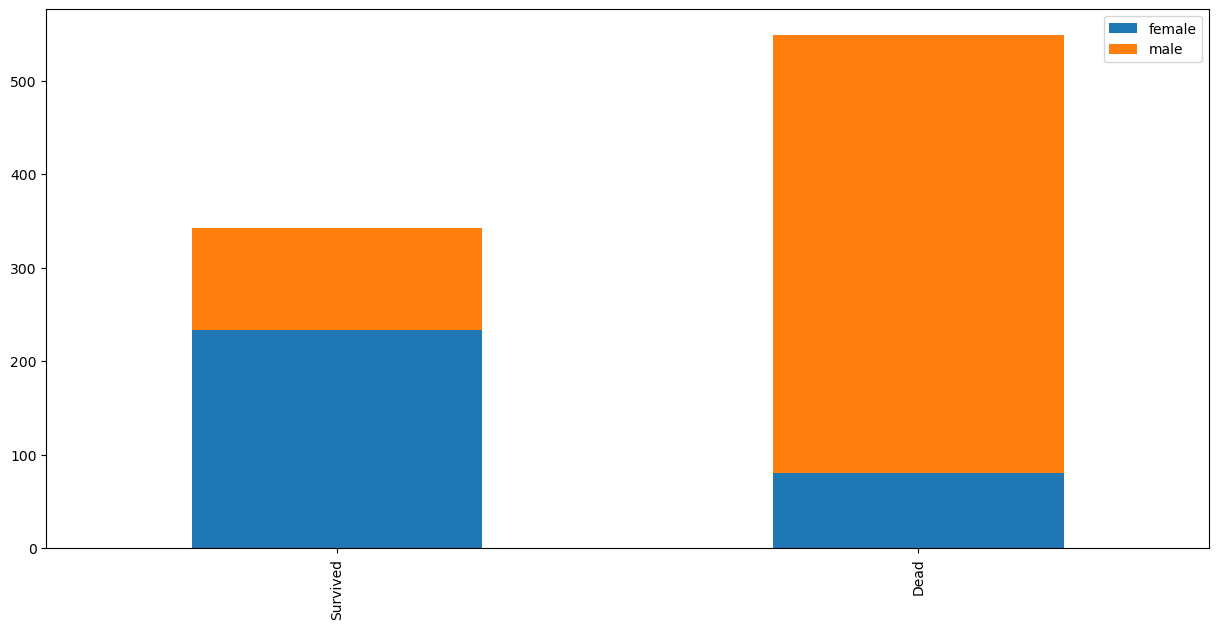

In [18]:
bar_chart('Sex')

In [19]:
survived_gender=survival['Sex'].value_counts()
survived_male=survived_gender[1]/len(data)*100
survived_female=survived_gender[0]/len(data)*100
print("Survived Passengers Per Gender:")
print(f"Male {round(survived_male,3)}%.")
print(f"Female {round(survived_female,3)}%")

Survived Passengers Per Gender:
Male 12.233%.
Female 26.15%


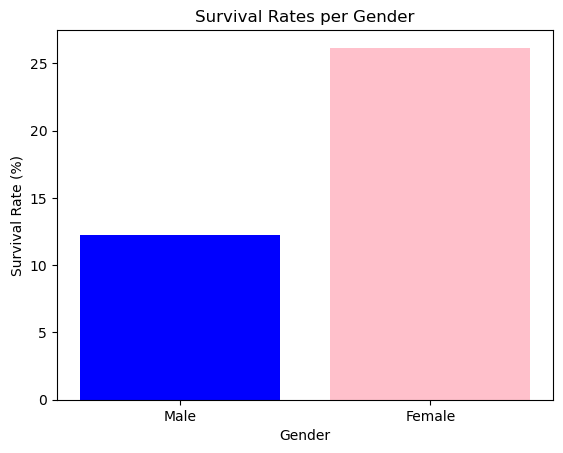

In [20]:
plt.bar(['Male', 'Female'], [survived_male, survived_female], color=['blue', 'pink'])
plt.title('Survival Rates per Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.show()

In [21]:
unsurvived_gender=unsurvival['Sex'].value_counts()
unsurvived_male=unsurvived_gender[0]/len(data)*100
unsurvived_female=unsurvived_gender[1]/len(data)*100
print("Un-Survived Passengers Per Gender:")
print(f"Male {round(unsurvived_male,3)}%.")
print(f"Female {round(unsurvived_female,3)}%")

Un-Survived Passengers Per Gender:
Male 52.525%.
Female 9.091%


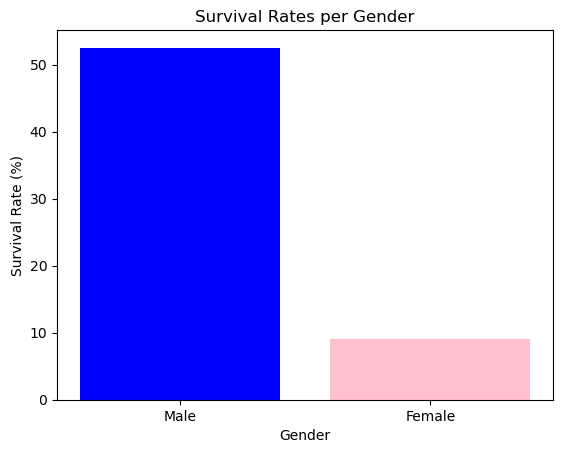

In [22]:
plt.bar(['Male', 'Female'], [unsurvived_male, unsurvived_female], color=['blue', 'pink'])
plt.title('Survival Rates per Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.show()

#### Age

In [23]:
def categorize_age(age):
    if age < 5:
        return "Babies"
    elif age >= 5 and age <= 17:
        return "Children"
    elif age >= 18 and age <= 35:
        return "Young adults"
    elif age >= 36 and age <= 50:
        return "Middle-aged adults"
    elif age >= 50 and age <= 100:
        return "Old adults"
    else:
        return "Un classified"

In [24]:
survival['age_group'] = survival['Age'].apply(categorize_age)

In [25]:
survival_per_age = survival['age_group'].value_counts()
survival_per_age

Young adults          146
Middle-aged adults     61
Un classified          52
Children               34
Babies                 27
Old adults             22
Name: age_group, dtype: int64

In [26]:
survived_babies =survival_per_age[5]/len(data['Survived'])*100
survived_children=survival_per_age[3]/len(data['Survived'])*100
survived_young_adults =survival_per_age[0]/len(data['Survived'])*100
survived_middle_adults=survival_per_age[1]/len(data['Survived'])*100
survived_old_adults=survival_per_age[4]/len(data['Survived'])*100

print("The  Babies passengers aged under 5 years: ",round(survived_babies,3),"%")
print("The  passengers with age that range between 6 and 17: ",round(survived_children,3),"%")
print("The passengers with age that range between 18 and 35: ",round(survived_young_adults,3),"%")
print("The passengers with age that range between 36 and 50: ",round(survived_middle_adults,3),"%")
print("The passengers aged Above 50 years:",round(survived_old_adults,3),"%")

The  Babies passengers aged under 5 years:  2.469 %
The  passengers with age that range between 6 and 17:  3.816 %
The passengers with age that range between 18 and 35:  16.386 %
The passengers with age that range between 36 and 50:  6.846 %
The passengers aged Above 50 years: 3.03 %


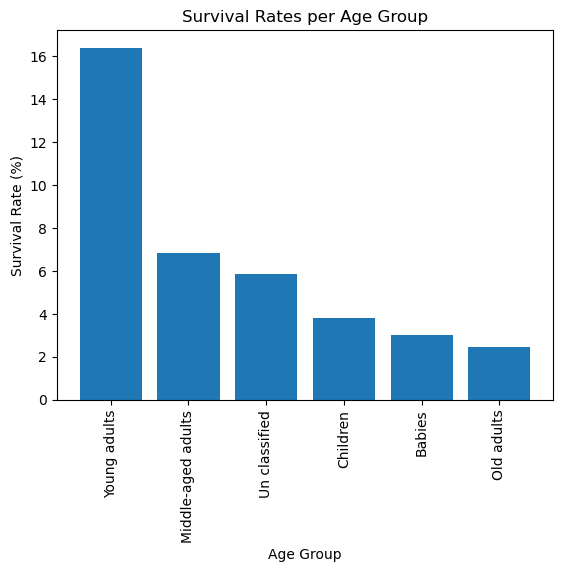

In [27]:
plt.bar(survival_per_age.index, (survival_per_age / len(data['Survived']) * 100).loc[survival_per_age.index])
plt.title('Survival Rates per Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.ylabel('Survival Rate (%)')
plt.show()

### Data cleaning

In [28]:
def clean(data):
    data = data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].mean(), inplace=True)
    data["Embarked"].fillna("U", inplace=True)
    return data

In [29]:
data = clean(data)
test= clean(test)

In [30]:
lo=preprocessing.LabelEncoder()
cols= ["Sex", "Embarked"]
for col in cols:
    data[col] = lo.fit_transform(data[col])
    test[col] = lo.transform(test[col])
    print(lo.classes_)

['female' 'male']
['C' 'Q' 'S' 'U']


### Model Selection

In [31]:
# X=data[['Pclass', 'Sex', 'Age',]]
X=data.drop("Survived", axis= 1)
y=data["Survived"]

In [32]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [33]:
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
training_score = []
testing_score = []

In [35]:
def model_prediction(model):
    model.fit(X_train,y_train)
    x_train_pred1 = model.predict(X_train)
    x_test_pred1 = model.predict(X_val)
    a = accuracy_score(y_train,x_train_pred1)*100
    b = accuracy_score(y_val,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_val,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_val,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_val,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_val,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

##### 1. Logistic regression

Accuracy_Score of LogisticRegression() model on Training Data is: 80.19662921348315
Accuracy_Score of LogisticRegression() model on Testing Data is: 81.00558659217877

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7857142857142857
Recall Score of LogisticRegression() model is: 0.7432432432432432
F1 Score of LogisticRegression() model is: 0.7638888888888888

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


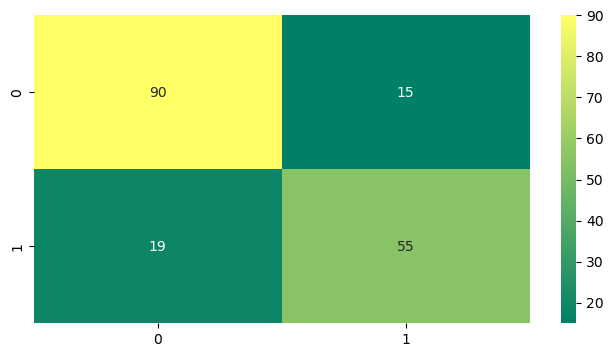

In [36]:
model_prediction(LogisticRegression())

#### 2. K Nearest neighbor

##### 1. Selection of a best k

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 79.35393258426966
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 72.06703910614524

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.7
Recall Score of KNeighborsClassifier() model is: 0.5675675675675675
F1 Score of KNeighborsClassifier() model is: 0.626865671641791

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


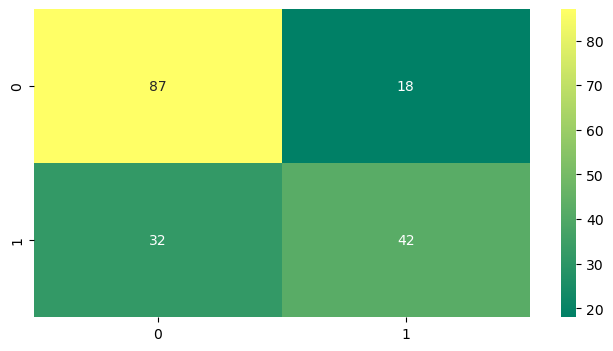

In [37]:
model_prediction(KNeighborsClassifier())

#### 3. Decision Tree

Accuracy_Score of DecisionTreeClassifier(min_samples_split=10) model on Training Data is: 90.73033707865169
Accuracy_Score of DecisionTreeClassifier(min_samples_split=10) model on Testing Data is: 83.24022346368714

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier(min_samples_split=10) model is: 0.8235294117647058
Recall Score of DecisionTreeClassifier(min_samples_split=10) model is: 0.7567567567567568
F1 Score of DecisionTreeClassifier(min_samples_split=10) model is: 0.7887323943661971

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier(min_samples_split=10) model is:


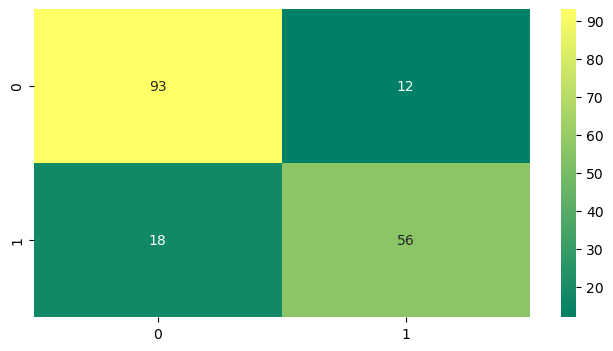

In [38]:
model_prediction(DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             ))

#### Pruned Decision Tree

Accuracy_Score of DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4, random_state=42) model on Training Data is: 83.98876404494382
Accuracy_Score of DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4, random_state=42) model on Testing Data is: 79.88826815642457

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4, random_state=42) model is: 0.8392857142857143
Recall Score of DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4, random_state=42) model is: 0.6351351351351351
F1 Score of DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4, random_state=42) model is: 0.723076923076923

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4, random_state=42) model is:


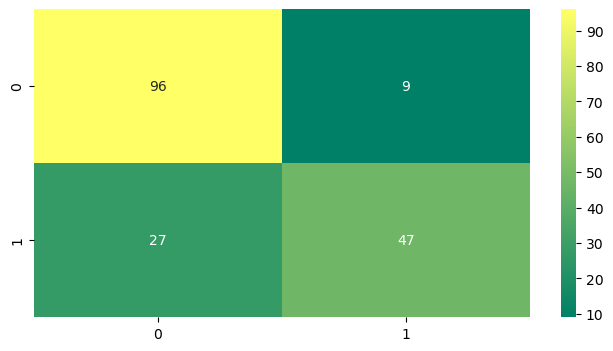

In [39]:
model_prediction( DecisionTreeClassifier(max_depth=4, random_state=42, ccp_alpha=0.001))
# dtree.fit(X_train,y_train).tree_.node_count

In [40]:
# plt.figure(figsize=(13, 6))
# plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Did not survive', 'Survived'])
# plt.title("A pruned tree structure")
# plt.tight_layout()
# plt.show()

In [41]:
# y2_pred = dtree.predict(X_val)
# accuracy_score(y_val,y2_pred)

#### Support Vector Machine

Accuracy_Score of SVC(C=10, gamma=1e-05, kernel='linear') model on Training Data is: 78.79213483146067
Accuracy_Score of SVC(C=10, gamma=1e-05, kernel='linear') model on Testing Data is: 78.2122905027933

------------------------------------------------------------------------
Precision Score of SVC(C=10, gamma=1e-05, kernel='linear') model is: 0.7536231884057971
Recall Score of SVC(C=10, gamma=1e-05, kernel='linear') model is: 0.7027027027027027
F1 Score of SVC(C=10, gamma=1e-05, kernel='linear') model is: 0.7272727272727273

------------------------------------------------------------------------
Confusion Matrix of SVC(C=10, gamma=1e-05, kernel='linear') model is:


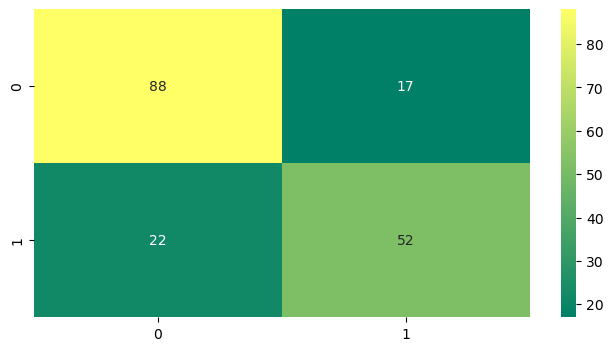

In [42]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC
SVM_KERNEL = "linear"
SVM_C = 10
SVM_GAMMA = 0.00001
model_prediction(SVC(kernel = SVM_KERNEL, C = SVM_C, gamma = SVM_GAMMA))

#### Random Forest

Accuracy_Score of RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1) model on Training Data is: 90.58988764044943
Accuracy_Score of RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1) model on Testing Data is: 84.35754189944134

------------------------------------------------------------------------
Precision Score of RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1) model is: 0.8484848484848485
Recall Score of RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1) model is: 0.7567567567567568
F1 Score of RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1) model is: 0.8000000000000002

---------------------

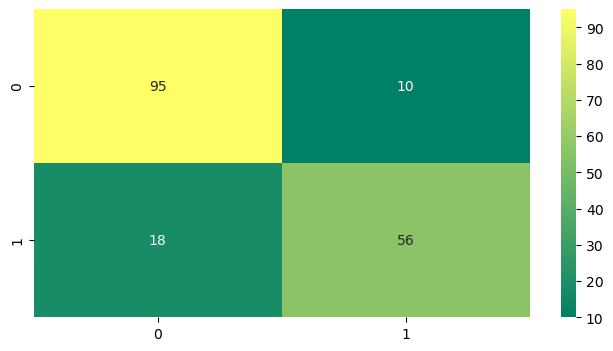

In [43]:
model_prediction(RandomForestClassifier(criterion='gini', n_estimators=700,min_samples_split=10,min_samples_leaf=1,oob_score=True,random_state=1,n_jobs=-1,bootstrap = True))

#### Gradient Boost Classifier

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 90.4494382022472
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 81.00558659217877

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.8125
Recall Score of GradientBoostingClassifier() model is: 0.7027027027027027
F1 Score of GradientBoostingClassifier() model is: 0.7536231884057971

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


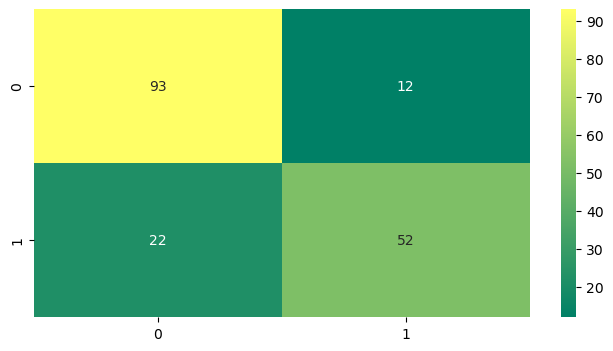

In [44]:
model_prediction(GradientBoostingClassifier())

#### XGBoost

In [45]:
classifier=XGBClassifier(colsample_bylevel=0.9,colsample_bytree=0.8,gamma=0.99,max_depth=5,min_child_weight=1,n_estimator=10,nthread=4,silent=True).fit(X_train, y_train)

In [46]:
y_pred1 = classifier.predict(X_val)
accuracy_score(y_val,y_pred1)

0.8212290502793296

#### Best Model

In [47]:
models = ["Logistic Regression","KNN","Non- pruned Decision Tree","pruned Decision Tree","SVM","Random Forest","Gradient Boost classifier"]
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

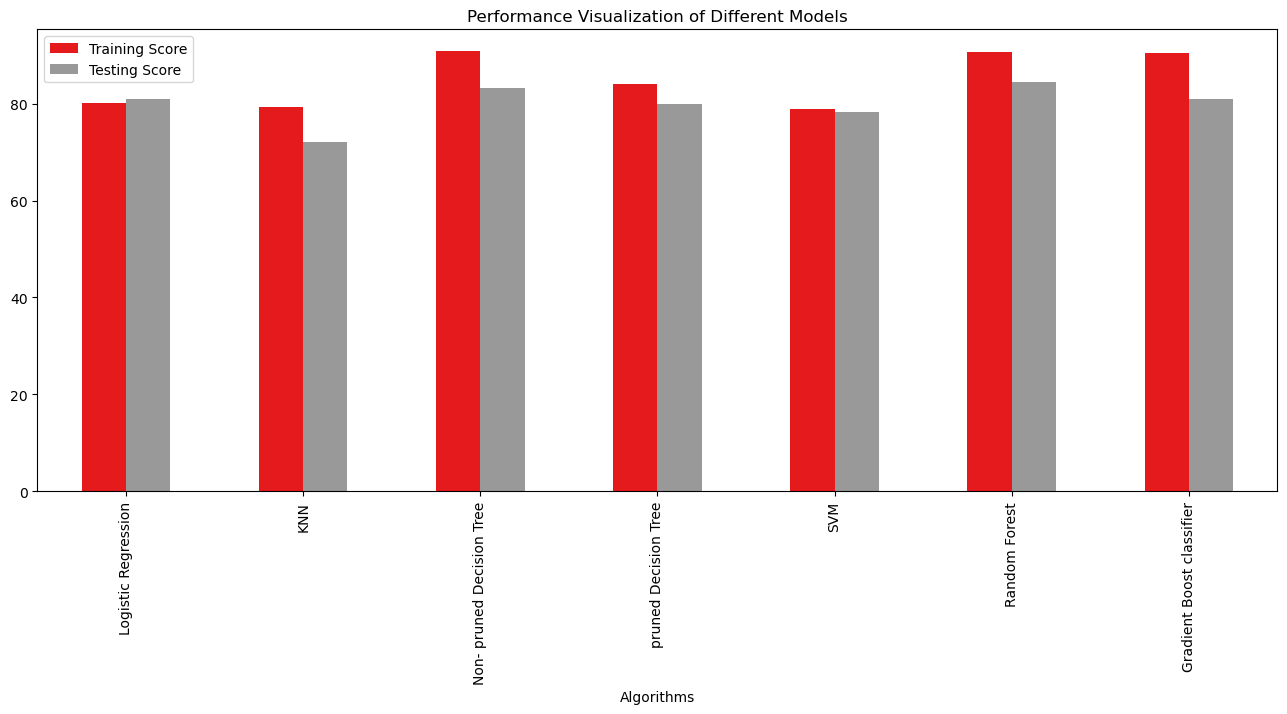

In [48]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

In [49]:
clf1=RandomForestClassifier(criterion='gini', n_estimators=700,min_samples_split=10,min_samples_leaf=1,oob_score=True,random_state=1,n_jobs=-1,bootstrap = True).fit(X,y)

### Submission

In [50]:
submission_pred = clf1.predict(test)

In [51]:
df = pd.DataFrame({"PassengerId": test_ids.values, "Survived": submission_pred})
df.to_csv("Submission.csv", index=False)

In [52]:
# !kaggle competitions submit -c titanic -f Submission.csv -m "Message"